Respiratory sounds are important indicators of respiratory health and respiratory disorders. The sound emitted when a person breathes is directly related to air movement, changes within lung tissue and the position of secretions within the lung. A wheezing sound, for example, is a common sign that a patient has an obstructive airway disease like asthma or chronic obstructive pulmonary disease (COPD).

These sounds can be recorded using digital stethoscopes and other recording techniques. This digital data opens up the possibility of using machine learning to automatically diagnose respiratory disorders like asthma, pneumonia and bronchiolitis, to name a few.

his Kaggle dataset includes:

920 .wav sound files
920 annotation .txt files
A text file listing the diagnosis for each patient
A text file explaining the file naming format
A text file listing 91 names (filename_differences.txt )
A text file containing demographic information for each patient

The demographic info file has 6 columns:
  - Patient number
  - Age
  - Sex
  - Adult BMI (kg/m2)
  - Child Weight (kg)
  - Child Height (cm)


Each audio file name is divided into 5 elements, separated with underscores (_).

1. Patient number (101,102,...,226)
2. Recording index
3. Chest location 
      a. Trachea (Tc)
      b. Anterior left (Al)
      c. Anterior right (Ar)
      d. Posterior left (Pl)
      e. Posterior right (Pr)
      f. Lateral left (Ll)
      g. Lateral right (Lr)
4. Acquisition mode 
     a. sequential/single channel (sc), 
     b. simultaneous/multichannel (mc)
5. Recording equipment 
     a. AKG C417L Microphone (AKGC417L), 
     b. 3M Littmann Classic II SE Stethoscope (LittC2SE), 
     c. 3M Litmmann 3200 Electronic Stethoscope (Litt3200), 
     d.  WelchAllyn Meditron Master Elite Electronic Stethoscope (Meditron)

The annotation text files have four columns:
- Beginning of respiratory cycle(s)
- End of respiratory cycle(s)
- Presence/absence of crackles (presence=1, absence=0)
- Presence/absence of wheezes (presence=1, absence=0)

The abbreviations used in the diagnosis file are:
- COPD: Chronic Obstructive Pulmonary Disease
- LRTI: Lower Respiratory Tract Infection
- URTI: Upper Respiratory Tract Infection

In [2]:
import tensorflow as tf
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [1]:
#Import all the required libraries
import pandas as pd
import numpy as np
import math

import librosa as lb # https://librosa.github.io/librosa/
import soundfile as sf # https://pysoundfile.readthedocs.io/en/latest/

import os

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats


Bad key "text.kerning_factor" on line 4 in
C:\annaconda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
diag = pd.read_csv(r'C:\MLCourse\Respiratory_Sound_Database\patient_diagnosis.csv', names=['pId', 'diagnosis'])
diag.head()

,pId,diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [3]:
diag.describe()

,pId
count,126.000000
mean,163.500000
std,36.517119
min,101.000000
25%,132.250000
50%,163.500000
75%,194.750000
max,226.000000


In [4]:
diag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pId        126 non-null    int64 
 1   diagnosis  126 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [5]:
ds= diag['diagnosis'].unique()
ds

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

In [6]:
files = [s.split('.')[0] for s in os.listdir(path = r'C:\MLCourse\Respiratory_Sound_Database\audio_and_txt_files') if '.txt' in s]
files

['101_1b1_Al_sc_Meditron',
 '101_1b1_Pr_sc_Meditron',
 '102_1b1_Ar_sc_Meditron',
 '103_2b2_Ar_mc_LittC2SE',
 '104_1b1_Al_sc_Litt3200',
 '104_1b1_Ar_sc_Litt3200',
 '104_1b1_Ll_sc_Litt3200',
 '104_1b1_Lr_sc_Litt3200',
 '104_1b1_Pl_sc_Litt3200',
 '104_1b1_Pr_sc_Litt3200',
 '105_1b1_Tc_sc_Meditron',
 '106_2b1_Pl_mc_LittC2SE',
 '106_2b1_Pr_mc_LittC2SE',
 '107_2b3_Al_mc_AKGC417L',
 '107_2b3_Ar_mc_AKGC417L',
 '107_2b3_Ll_mc_AKGC417L',
 '107_2b3_Lr_mc_AKGC417L',
 '107_2b3_Pl_mc_AKGC417L',
 '107_2b3_Pr_mc_AKGC417L',
 '107_2b3_Tc_mc_AKGC417L',
 '107_2b4_Al_mc_AKGC417L',
 '107_2b4_Ar_mc_AKGC417L',
 '107_2b4_Ll_mc_AKGC417L',
 '107_2b4_Lr_mc_AKGC417L',
 '107_2b4_Pl_mc_AKGC417L',
 '107_2b4_Pr_mc_AKGC417L',
 '107_2b4_Tc_mc_AKGC417L',
 '107_2b5_Al_mc_AKGC417L',
 '107_2b5_Ar_mc_AKGC417L',
 '107_2b5_Ll_mc_AKGC417L',
 '107_2b5_Lr_mc_AKGC417L',
 '107_2b5_Pl_mc_AKGC417L',
 '107_2b5_Pr_mc_AKGC417L',
 '107_2b5_Tc_mc_AKGC417L',
 '107_3p2_Al_mc_AKGC417L',
 '107_3p2_Ar_mc_AKGC417L',
 '107_3p2_Ll_mc_AKGC417L',
 

We know that our filenames have a certain meaning in them. We get all info (or tokens) by splitting the filename by using "_" as separators. We define a function to do this task.

In [7]:
def tokenize_file(filename):
    return filename.split('_')
tokenize_file( r'C:\MLCourse\Respiratory_Sound_Database\audio_and_txt_files\221_2b3_Al_mc_LittC2SE')

['C:\\MLCourse\\Respiratory',
 'Sound',
 'Database\\audio',
 'and',
 'txt',
 'files\\221',
 '2b3',
 'Al',
 'mc',
 'LittC2SE']

In [8]:
files_ = []
for f in files:
    df = pd.read_csv(r'C:\MLCourse\Respiratory_Sound_Database\audio_and_txt_files' + '/' + f + '.txt', sep='\t', names=['start', 'end', 'crackles', 'wheezes'])
    df['filename'] = f
    #get filename features
    f_features = tokenize_file(f)
    df['pId'] = f_features[0]
    df['ac_mode'] = f_features[3]
    
    files_.append(df)
    
files_df = pd.concat(files_)
files_df.reset_index()
files_df.head()

,start,end,crackles,wheezes,filename,pId,ac_mode
0,0.036,0.579,0,0,101_1b1_Al_sc_Meditron,101,sc
1,0.579,2.450,0,0,101_1b1_Al_sc_Meditron,101,sc
2,2.450,3.893,0,0,101_1b1_Al_sc_Meditron,101,sc
3,3.893,5.793,0,0,101_1b1_Al_sc_Meditron,101,sc
4,5.793,7.521,0,0,101_1b1_Al_sc_Meditron,101,sc


Now we need to merge two dataframe on the basis of pId but make sure that the datatype is same in both dataframe.As the pId is different we willl cast both to float.

In [9]:
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 10
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   start     6898 non-null   float64
 1   end       6898 non-null   float64
 2   crackles  6898 non-null   int64  
 3   wheezes   6898 non-null   int64  
 4   filename  6898 non-null   object 
 5   pId       6898 non-null   object 
 6   ac_mode   6898 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 431.1+ KB


In [10]:
diag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pId        126 non-null    int64 
 1   diagnosis  126 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [11]:
files_df['pId'] = files_df['pId'].astype('int64')
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 10
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   start     6898 non-null   float64
 1   end       6898 non-null   float64
 2   crackles  6898 non-null   int64  
 3   wheezes   6898 non-null   int64  
 4   filename  6898 non-null   object 
 5   pId       6898 non-null   int64  
 6   ac_mode   6898 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 431.1+ KB


In [12]:
files_df = pd.merge(files_df, diag, on='pId')
files_df.head()

,start,end,crackles,wheezes,filename,pId,ac_mode,diagnosis
0,0.036,0.579,0,0,101_1b1_Al_sc_Meditron,101,sc,URTI
1,0.579,2.450,0,0,101_1b1_Al_sc_Meditron,101,sc,URTI
2,2.450,3.893,0,0,101_1b1_Al_sc_Meditron,101,sc,URTI
3,3.893,5.793,0,0,101_1b1_Al_sc_Meditron,101,sc,URTI
4,5.793,7.521,0,0,101_1b1_Al_sc_Meditron,101,sc,URTI


We need to get the clear sound of starting and ending of breathing. and also make sure that the length is same for feeding in the neural network later on. So, we are going to slice the signal and maintain the length.

In [13]:
def slice_data(start, end, raw_data,  sample_rate):
    max_ind = len(raw_data) 
    start_ind = min(int(start * sample_rate), max_ind)
    end_ind = min(int(end * sample_rate), max_ind)
    return raw_data[start_ind: end_ind]

In [14]:
files_df['len_per_slice'] = files_df['end'].sub(files_df['start'], axis = 0) 
max_len_per_slice = max(files_df['len_per_slice'])
max_len_per_slice

16.163

Trying to figure out the optimal length required 

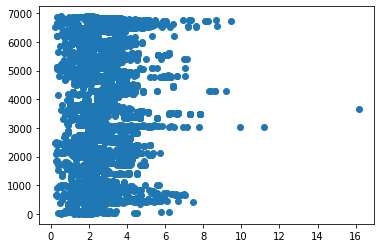

In [15]:
plt.scatter(files_df['len_per_slice'], y=files_df.index)

Visualizing the datasets according to respiratory disease classification.

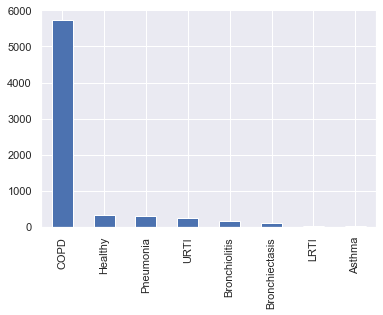

In [16]:
import seaborn as sns
sns.set()
Class_counts = files_df['diagnosis'].value_counts()

Class_counts.plot(kind='bar')


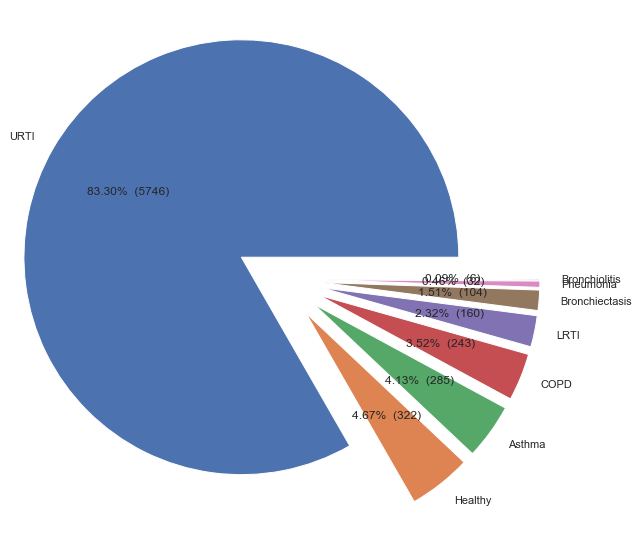

In [17]:
sns.set(rc={'figure.figsize':(20,10)})


labels = list(files_df['diagnosis'].unique())
Class_counts = files_df['diagnosis'].value_counts()
values= list(Class_counts)
explode= [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]



fig1, ax1 = plt.subplots()
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, labels=labels, autopct=make_autopct(values),explode=explode)
plt.show()

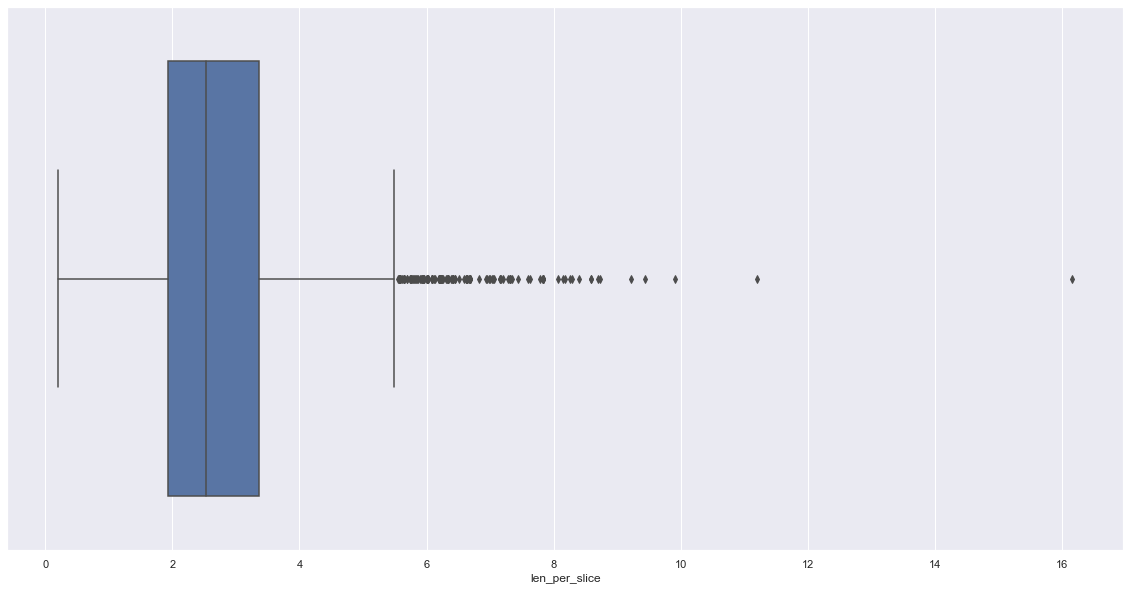

In [18]:
#Detecting Outlier
ax = sns.boxplot(files_df['len_per_slice'])


In [19]:
force_max_len = math.ceil(boxplot_stats(files_df['len_per_slice'])[0]['whishi'])
force_max_len

6

Now we need to define the computation length for each slice


In [20]:
def compute_len(samp_rate=22050, time=force_max_len, acquisition_mode=0):
    '''Computes the supposed length of sliced data
        samp_size = sample size from the data
        samp_rate = sampling rate. by default since we're working on 24-bit files, we'll use 96kHz
        time = length of time for the audio file. by default we'll use the max we have which is 5.48
        acquisition_mode = either mono or stereo. 0 for mono, 1 for stereo
    '''
    comp_len = 0
    if acquisition_mode == 1: #ac mode is single channel which means it's 'mono'
        comp_len = samp_rate * time
    else: #stereo
        comp_len = (samp_rate * time) * 2

    return comp_len

In [29]:
#create output path
os.makedirs(r'C:\MLCourse\Respiratory_Sound_Database\Output')

In [30]:
for d in ds:
    path = os.path.join('Output', d)
    os.makedirs(path)

Read the audio file
Slice the audio file
Pad in case it's less than 6 sec
Save

In [33]:
i=0
for idx, row in files_df.iterrows():
    filename = row['filename']
    start = row['start']
    end = row['end']
    diagn = row['diagnosis']
    
    #check len and force to 6 sec if more than that
    if force_max_len < end - start:
        end = start + force_max_len
    
    aud_loc = r'C:\MLCourse\Respiratory_Sound_Database\audio_and_txt_files' + '/' + f + '.wav'
    
    if idx != 0:
        if files_df.iloc[idx-1]['filename'] == filename:
            i=i+1
        else:
            i=0
    n_filename = filename + '_' + str(i) + '.wav'
    path = 'output/' + diagn + '/' + n_filename
    
    print('processing ' + n_filename + '...')

    data, samplingrate = lb.load(aud_loc)
    sliced_data = slice_data(start=start, end=end, raw_data=data, sample_rate=samplingrate)
    
    #pad audio if < forced_max_len
    a_len = compute_len(samp_rate=samplingrate, acquisition_mode=row['ac_mode']=='sc')
    padded_data = lb.util.pad_center(sliced_data, a_len)

    sf.write(file=path, data=padded_data, samplerate=samplingrate)

processing 101_1b1_Al_sc_Meditron_0.wav...
processing 101_1b1_Al_sc_Meditron_1.wav...
processing 101_1b1_Al_sc_Meditron_2.wav...
processing 101_1b1_Al_sc_Meditron_3.wav...
processing 101_1b1_Al_sc_Meditron_4.wav...
processing 101_1b1_Al_sc_Meditron_5.wav...
processing 101_1b1_Al_sc_Meditron_6.wav...
processing 101_1b1_Al_sc_Meditron_7.wav...
processing 101_1b1_Al_sc_Meditron_8.wav...
processing 101_1b1_Al_sc_Meditron_9.wav...
processing 101_1b1_Al_sc_Meditron_10.wav...
processing 101_1b1_Al_sc_Meditron_11.wav...
processing 101_1b1_Pr_sc_Meditron_0.wav...
processing 101_1b1_Pr_sc_Meditron_1.wav...
processing 101_1b1_Pr_sc_Meditron_2.wav...
processing 101_1b1_Pr_sc_Meditron_3.wav...
processing 101_1b1_Pr_sc_Meditron_4.wav...
processing 101_1b1_Pr_sc_Meditron_5.wav...
processing 101_1b1_Pr_sc_Meditron_6.wav...
processing 101_1b1_Pr_sc_Meditron_7.wav...
processing 101_1b1_Pr_sc_Meditron_8.wav...
processing 101_1b1_Pr_sc_Meditron_9.wav...
processing 101_1b1_Pr_sc_Meditron_10.wav...
processi

processing 107_2b4_Ar_mc_AKGC417L_4.wav...
processing 107_2b4_Ar_mc_AKGC417L_5.wav...
processing 107_2b4_Ar_mc_AKGC417L_6.wav...
processing 107_2b4_Ar_mc_AKGC417L_7.wav...
processing 107_2b4_Ll_mc_AKGC417L_0.wav...
processing 107_2b4_Ll_mc_AKGC417L_1.wav...
processing 107_2b4_Ll_mc_AKGC417L_2.wav...
processing 107_2b4_Ll_mc_AKGC417L_3.wav...
processing 107_2b4_Ll_mc_AKGC417L_4.wav...
processing 107_2b4_Ll_mc_AKGC417L_5.wav...
processing 107_2b4_Ll_mc_AKGC417L_6.wav...
processing 107_2b4_Ll_mc_AKGC417L_7.wav...
processing 107_2b4_Lr_mc_AKGC417L_0.wav...
processing 107_2b4_Lr_mc_AKGC417L_1.wav...
processing 107_2b4_Lr_mc_AKGC417L_2.wav...
processing 107_2b4_Lr_mc_AKGC417L_3.wav...
processing 107_2b4_Lr_mc_AKGC417L_4.wav...
processing 107_2b4_Lr_mc_AKGC417L_5.wav...
processing 107_2b4_Lr_mc_AKGC417L_6.wav...
processing 107_2b4_Lr_mc_AKGC417L_7.wav...
processing 107_2b4_Pl_mc_AKGC417L_0.wav...
processing 107_2b4_Pl_mc_AKGC417L_1.wav...
processing 107_2b4_Pl_mc_AKGC417L_2.wav...
processing 

processing 109_1b1_Ll_sc_Litt3200_1.wav...
processing 109_1b1_Ll_sc_Litt3200_2.wav...
processing 109_1b1_Ll_sc_Litt3200_3.wav...
processing 109_1b1_Ll_sc_Litt3200_4.wav...
processing 109_1b1_Ll_sc_Litt3200_5.wav...
processing 109_1b1_Ll_sc_Litt3200_6.wav...
processing 109_1b1_Ll_sc_Litt3200_7.wav...
processing 109_1b1_Lr_sc_Litt3200_0.wav...
processing 109_1b1_Lr_sc_Litt3200_1.wav...
processing 109_1b1_Lr_sc_Litt3200_2.wav...
processing 109_1b1_Lr_sc_Litt3200_3.wav...
processing 109_1b1_Lr_sc_Litt3200_4.wav...
processing 109_1b1_Lr_sc_Litt3200_5.wav...
processing 109_1b1_Lr_sc_Litt3200_6.wav...
processing 109_1b1_Lr_sc_Litt3200_7.wav...
processing 109_1b1_Pl_sc_Litt3200_0.wav...
processing 109_1b1_Pl_sc_Litt3200_1.wav...
processing 109_1b1_Pl_sc_Litt3200_2.wav...
processing 109_1b1_Pl_sc_Litt3200_3.wav...
processing 109_1b1_Pl_sc_Litt3200_4.wav...
processing 109_1b1_Pl_sc_Litt3200_5.wav...
processing 109_1b1_Pl_sc_Litt3200_6.wav...
processing 109_1b1_Pl_sc_Litt3200_7.wav...
processing 

processing 113_1b1_Ll_sc_Litt3200_8.wav...
processing 113_1b1_Ll_sc_Litt3200_9.wav...
processing 113_1b1_Ll_sc_Litt3200_10.wav...
processing 113_1b1_Lr_sc_Litt3200_0.wav...
processing 113_1b1_Lr_sc_Litt3200_1.wav...
processing 113_1b1_Lr_sc_Litt3200_2.wav...
processing 113_1b1_Lr_sc_Litt3200_3.wav...
processing 113_1b1_Lr_sc_Litt3200_4.wav...
processing 113_1b1_Lr_sc_Litt3200_5.wav...
processing 113_1b1_Lr_sc_Litt3200_6.wav...
processing 113_1b1_Pl_sc_Litt3200_0.wav...
processing 113_1b1_Pl_sc_Litt3200_1.wav...
processing 113_1b1_Pl_sc_Litt3200_2.wav...
processing 113_1b1_Pl_sc_Litt3200_3.wav...
processing 113_1b1_Pl_sc_Litt3200_4.wav...
processing 113_1b1_Pl_sc_Litt3200_5.wav...
processing 113_1b1_Pl_sc_Litt3200_6.wav...
processing 113_1b1_Pl_sc_Litt3200_7.wav...
processing 113_1b1_Pr_sc_Litt3200_0.wav...
processing 113_1b1_Pr_sc_Litt3200_1.wav...
processing 113_1b1_Pr_sc_Litt3200_2.wav...
processing 113_1b1_Pr_sc_Litt3200_3.wav...
processing 113_1b1_Pr_sc_Litt3200_4.wav...
processing

processing 120_1b1_Ar_sc_Meditron_16.wav...
processing 120_1b1_Ar_sc_Meditron_17.wav...
processing 120_1b1_Ar_sc_Meditron_18.wav...
processing 120_1b1_Ar_sc_Meditron_19.wav...
processing 120_1b1_Lr_sc_Meditron_0.wav...
processing 120_1b1_Lr_sc_Meditron_1.wav...
processing 120_1b1_Lr_sc_Meditron_2.wav...
processing 120_1b1_Lr_sc_Meditron_3.wav...
processing 120_1b1_Lr_sc_Meditron_4.wav...
processing 120_1b1_Lr_sc_Meditron_5.wav...
processing 120_1b1_Lr_sc_Meditron_6.wav...
processing 120_1b1_Lr_sc_Meditron_7.wav...
processing 120_1b1_Lr_sc_Meditron_8.wav...
processing 120_1b1_Lr_sc_Meditron_9.wav...
processing 120_1b1_Lr_sc_Meditron_10.wav...
processing 120_1b1_Lr_sc_Meditron_11.wav...
processing 120_1b1_Lr_sc_Meditron_12.wav...
processing 120_1b1_Lr_sc_Meditron_13.wav...
processing 120_1b1_Lr_sc_Meditron_14.wav...
processing 120_1b1_Lr_sc_Meditron_15.wav...
processing 120_1b1_Lr_sc_Meditron_16.wav...
processing 120_1b1_Lr_sc_Meditron_17.wav...
processing 120_1b1_Lr_sc_Meditron_18.wav..

processing 124_1b1_Lr_sc_Litt3200_3.wav...
processing 124_1b1_Lr_sc_Litt3200_4.wav...
processing 124_1b1_Lr_sc_Litt3200_5.wav...
processing 124_1b1_Lr_sc_Litt3200_6.wav...
processing 124_1b1_Lr_sc_Litt3200_7.wav...
processing 124_1b1_Lr_sc_Litt3200_8.wav...
processing 124_1b1_Lr_sc_Litt3200_9.wav...
processing 124_1b1_Pl_sc_Litt3200_0.wav...
processing 124_1b1_Pl_sc_Litt3200_1.wav...
processing 124_1b1_Pl_sc_Litt3200_2.wav...
processing 124_1b1_Pl_sc_Litt3200_3.wav...
processing 124_1b1_Pl_sc_Litt3200_4.wav...
processing 124_1b1_Pl_sc_Litt3200_5.wav...
processing 124_1b1_Pl_sc_Litt3200_6.wav...
processing 124_1b1_Pr_sc_Litt3200_0.wav...
processing 124_1b1_Pr_sc_Litt3200_1.wav...
processing 124_1b1_Pr_sc_Litt3200_2.wav...
processing 124_1b1_Pr_sc_Litt3200_3.wav...
processing 124_1b1_Pr_sc_Litt3200_4.wav...
processing 124_1b1_Pr_sc_Litt3200_5.wav...
processing 125_1b1_Tc_sc_Meditron_0.wav...
processing 125_1b1_Tc_sc_Meditron_1.wav...
processing 125_1b1_Tc_sc_Meditron_2.wav...
processing 

processing 130_1p4_Pr_mc_AKGC417L_4.wav...
processing 130_1p4_Pr_mc_AKGC417L_5.wav...
processing 130_1p4_Pr_mc_AKGC417L_6.wav...
processing 130_1p4_Tc_mc_AKGC417L_0.wav...
processing 130_1p4_Tc_mc_AKGC417L_1.wav...
processing 130_1p4_Tc_mc_AKGC417L_2.wav...
processing 130_1p4_Tc_mc_AKGC417L_3.wav...
processing 130_1p4_Tc_mc_AKGC417L_4.wav...
processing 130_1p4_Tc_mc_AKGC417L_5.wav...
processing 130_1p4_Tc_mc_AKGC417L_6.wav...
processing 130_1p4_Tc_mc_AKGC417L_7.wav...
processing 130_2b2_Al_mc_AKGC417L_0.wav...
processing 130_2b2_Al_mc_AKGC417L_1.wav...
processing 130_2b2_Al_mc_AKGC417L_2.wav...
processing 130_2b2_Al_mc_AKGC417L_3.wav...
processing 130_2b2_Al_mc_AKGC417L_4.wav...
processing 130_2b2_Al_mc_AKGC417L_5.wav...
processing 130_2b2_Al_mc_AKGC417L_6.wav...
processing 130_2b2_Al_mc_AKGC417L_7.wav...
processing 130_2b2_Ar_mc_AKGC417L_0.wav...
processing 130_2b2_Ar_mc_AKGC417L_1.wav...
processing 130_2b2_Ar_mc_AKGC417L_2.wav...
processing 130_2b2_Ar_mc_AKGC417L_3.wav...
processing 

processing 130_2p5_Al_mc_AKGC417L_6.wav...
processing 130_2p5_Al_mc_AKGC417L_7.wav...
processing 130_2p5_Al_mc_AKGC417L_8.wav...
processing 130_2p5_Al_mc_AKGC417L_9.wav...
processing 130_2p5_Al_mc_AKGC417L_10.wav...
processing 130_2p5_Ar_mc_AKGC417L_0.wav...
processing 130_2p5_Ar_mc_AKGC417L_1.wav...
processing 130_2p5_Ar_mc_AKGC417L_2.wav...
processing 130_2p5_Ar_mc_AKGC417L_3.wav...
processing 130_2p5_Ar_mc_AKGC417L_4.wav...
processing 130_2p5_Ar_mc_AKGC417L_5.wav...
processing 130_2p5_Ar_mc_AKGC417L_6.wav...
processing 130_2p5_Ar_mc_AKGC417L_7.wav...
processing 130_2p5_Ar_mc_AKGC417L_8.wav...
processing 130_2p5_Ar_mc_AKGC417L_9.wav...
processing 130_2p5_Ar_mc_AKGC417L_10.wav...
processing 130_2p5_Lr_mc_AKGC417L_0.wav...
processing 130_2p5_Lr_mc_AKGC417L_1.wav...
processing 130_2p5_Lr_mc_AKGC417L_2.wav...
processing 130_2p5_Lr_mc_AKGC417L_3.wav...
processing 130_2p5_Lr_mc_AKGC417L_4.wav...
processing 130_2p5_Lr_mc_AKGC417L_5.wav...
processing 130_2p5_Lr_mc_AKGC417L_6.wav...
processin

processing 131_1b1_Al_sc_Meditron_5.wav...
processing 131_1b1_Al_sc_Meditron_6.wav...
processing 131_1b1_Al_sc_Meditron_7.wav...
processing 131_1b1_Al_sc_Meditron_8.wav...
processing 131_1b1_Al_sc_Meditron_9.wav...
processing 131_1b1_Al_sc_Meditron_10.wav...
processing 132_2b1_Lr_mc_LittC2SE_0.wav...
processing 132_2b1_Lr_mc_LittC2SE_1.wav...
processing 132_2b1_Lr_mc_LittC2SE_2.wav...
processing 132_2b1_Lr_mc_LittC2SE_3.wav...
processing 132_2b1_Lr_mc_LittC2SE_4.wav...
processing 132_2b1_Lr_mc_LittC2SE_5.wav...
processing 132_2b1_Lr_mc_LittC2SE_6.wav...
processing 132_2b1_Lr_mc_LittC2SE_7.wav...
processing 132_2b1_Lr_mc_LittC2SE_8.wav...
processing 132_2b2_Lr_mc_LittC2SE_0.wav...
processing 132_2b2_Lr_mc_LittC2SE_1.wav...
processing 132_2b2_Lr_mc_LittC2SE_2.wav...
processing 132_2b2_Lr_mc_LittC2SE_3.wav...
processing 132_2b2_Lr_mc_LittC2SE_4.wav...
processing 132_2b2_Lr_mc_LittC2SE_5.wav...
processing 132_2b2_Lr_mc_LittC2SE_6.wav...
processing 132_2b2_Lr_mc_LittC2SE_7.wav...
processing

processing 134_2b2_Al_mc_LittC2SE_0.wav...
processing 134_2b2_Al_mc_LittC2SE_1.wav...
processing 134_2b2_Al_mc_LittC2SE_2.wav...
processing 134_2b2_Al_mc_LittC2SE_3.wav...
processing 134_2b2_Al_mc_LittC2SE_4.wav...
processing 134_2b2_Al_mc_LittC2SE_5.wav...
processing 134_2b2_Al_mc_LittC2SE_6.wav...
processing 134_2b2_Ar_mc_LittC2SE_0.wav...
processing 134_2b2_Ar_mc_LittC2SE_1.wav...
processing 134_2b2_Ar_mc_LittC2SE_2.wav...
processing 134_2b2_Ar_mc_LittC2SE_3.wav...
processing 134_2b2_Ar_mc_LittC2SE_4.wav...
processing 134_2b2_Ar_mc_LittC2SE_5.wav...
processing 134_2b2_Ar_mc_LittC2SE_6.wav...
processing 134_2b3_Ar_mc_LittC2SE_0.wav...
processing 134_2b3_Ar_mc_LittC2SE_1.wav...
processing 134_2b3_Ar_mc_LittC2SE_2.wav...
processing 134_2b3_Ar_mc_LittC2SE_3.wav...
processing 134_2b3_Ar_mc_LittC2SE_4.wav...
processing 134_2b3_Ar_mc_LittC2SE_5.wav...
processing 135_2b1_Al_mc_LittC2SE_0.wav...
processing 135_2b1_Al_mc_LittC2SE_1.wav...
processing 135_2b1_Al_mc_LittC2SE_2.wav...
processing 

processing 138_1p2_Tc_mc_AKGC417L_3.wav...
processing 138_1p2_Tc_mc_AKGC417L_4.wav...
processing 138_1p3_Al_mc_AKGC417L_0.wav...
processing 138_1p3_Al_mc_AKGC417L_1.wav...
processing 138_1p3_Al_mc_AKGC417L_2.wav...
processing 138_1p3_Al_mc_AKGC417L_3.wav...
processing 138_1p3_Al_mc_AKGC417L_4.wav...
processing 138_1p3_Ar_mc_AKGC417L_0.wav...
processing 138_1p3_Ar_mc_AKGC417L_1.wav...
processing 138_1p3_Ar_mc_AKGC417L_2.wav...
processing 138_1p3_Ar_mc_AKGC417L_3.wav...
processing 138_1p3_Ar_mc_AKGC417L_4.wav...
processing 138_1p3_Ll_mc_AKGC417L_0.wav...
processing 138_1p3_Ll_mc_AKGC417L_1.wav...
processing 138_1p3_Ll_mc_AKGC417L_2.wav...
processing 138_1p3_Ll_mc_AKGC417L_3.wav...
processing 138_1p3_Ll_mc_AKGC417L_4.wav...
processing 138_1p3_Lr_mc_AKGC417L_0.wav...
processing 138_1p3_Lr_mc_AKGC417L_1.wav...
processing 138_1p3_Lr_mc_AKGC417L_2.wav...
processing 138_1p3_Lr_mc_AKGC417L_3.wav...
processing 138_1p3_Lr_mc_AKGC417L_4.wav...
processing 138_1p3_Pl_mc_AKGC417L_0.wav...
processing 

processing 140_2b3_Ll_mc_LittC2SE_8.wav...
processing 140_2b3_Tc_mc_LittC2SE_0.wav...
processing 140_2b3_Tc_mc_LittC2SE_1.wav...
processing 140_2b3_Tc_mc_LittC2SE_2.wav...
processing 140_2b3_Tc_mc_LittC2SE_3.wav...
processing 140_2b3_Tc_mc_LittC2SE_4.wav...
processing 140_2b3_Tc_mc_LittC2SE_5.wav...
processing 140_2b3_Tc_mc_LittC2SE_6.wav...
processing 140_2b3_Tc_mc_LittC2SE_7.wav...
processing 140_2b3_Tc_mc_LittC2SE_8.wav...
processing 140_2b3_Tc_mc_LittC2SE_9.wav...
processing 141_1b1_Pr_mc_LittC2SE_0.wav...
processing 141_1b1_Pr_mc_LittC2SE_1.wav...
processing 141_1b1_Pr_mc_LittC2SE_2.wav...
processing 141_1b1_Pr_mc_LittC2SE_3.wav...
processing 141_1b1_Pr_mc_LittC2SE_4.wav...
processing 141_1b2_Ar_mc_LittC2SE_0.wav...
processing 141_1b2_Ar_mc_LittC2SE_1.wav...
processing 141_1b2_Ar_mc_LittC2SE_2.wav...
processing 141_1b2_Ar_mc_LittC2SE_3.wav...
processing 141_1b2_Ar_mc_LittC2SE_4.wav...
processing 141_1b2_Ar_mc_LittC2SE_5.wav...
processing 141_1b2_Lr_mc_LittC2SE_0.wav...
processing 

processing 146_8p3_Lr_mc_AKGC417L_0.wav...
processing 146_8p3_Lr_mc_AKGC417L_1.wav...
processing 146_8p3_Lr_mc_AKGC417L_2.wav...
processing 146_8p3_Lr_mc_AKGC417L_3.wav...
processing 146_8p3_Lr_mc_AKGC417L_4.wav...
processing 146_8p3_Lr_mc_AKGC417L_5.wav...
processing 146_8p3_Lr_mc_AKGC417L_6.wav...
processing 146_8p3_Lr_mc_AKGC417L_7.wav...
processing 146_8p3_Lr_mc_AKGC417L_8.wav...
processing 146_8p3_Pl_mc_AKGC417L_0.wav...
processing 146_8p3_Pl_mc_AKGC417L_1.wav...
processing 146_8p3_Pl_mc_AKGC417L_2.wav...
processing 146_8p3_Pl_mc_AKGC417L_3.wav...
processing 146_8p3_Pl_mc_AKGC417L_4.wav...
processing 146_8p3_Pl_mc_AKGC417L_5.wav...
processing 146_8p3_Pl_mc_AKGC417L_6.wav...
processing 146_8p3_Pl_mc_AKGC417L_7.wav...
processing 146_8p3_Pl_mc_AKGC417L_8.wav...
processing 146_8p3_Pr_mc_AKGC417L_0.wav...
processing 146_8p3_Pr_mc_AKGC417L_1.wav...
processing 146_8p3_Pr_mc_AKGC417L_2.wav...
processing 146_8p3_Pr_mc_AKGC417L_3.wav...
processing 146_8p3_Pr_mc_AKGC417L_4.wav...
processing 

processing 149_1b1_Pl_sc_Meditron_15.wav...
processing 149_1b1_Pl_sc_Meditron_16.wav...
processing 150_1b2_Al_sc_Meditron_0.wav...
processing 150_1b2_Al_sc_Meditron_1.wav...
processing 150_1b2_Al_sc_Meditron_2.wav...
processing 150_1b2_Al_sc_Meditron_3.wav...
processing 150_1b2_Al_sc_Meditron_4.wav...
processing 150_1b2_Al_sc_Meditron_5.wav...
processing 150_1b2_Al_sc_Meditron_6.wav...
processing 150_1b2_Al_sc_Meditron_7.wav...
processing 150_1b2_Al_sc_Meditron_8.wav...
processing 150_1b2_Al_sc_Meditron_9.wav...
processing 150_1b2_Al_sc_Meditron_10.wav...
processing 150_1b2_Al_sc_Meditron_11.wav...
processing 150_1b2_Al_sc_Meditron_12.wav...
processing 150_1b2_Al_sc_Meditron_13.wav...
processing 150_1b2_Al_sc_Meditron_14.wav...
processing 150_1b2_Al_sc_Meditron_15.wav...
processing 150_1b2_Al_sc_Meditron_16.wav...
processing 151_2p2_Al_mc_AKGC417L_0.wav...
processing 151_2p2_Al_mc_AKGC417L_1.wav...
processing 151_2p2_Al_mc_AKGC417L_2.wav...
processing 151_2p2_Al_mc_AKGC417L_3.wav...
pr

processing 152_1b1_Al_sc_Meditron_4.wav...
processing 152_1b1_Al_sc_Meditron_5.wav...
processing 152_1b1_Al_sc_Meditron_6.wav...
processing 153_1b1_Al_sc_Meditron_0.wav...
processing 153_1b1_Al_sc_Meditron_1.wav...
processing 153_1b1_Al_sc_Meditron_2.wav...
processing 153_1b1_Al_sc_Meditron_3.wav...
processing 153_1b1_Al_sc_Meditron_4.wav...
processing 153_1b1_Al_sc_Meditron_5.wav...
processing 153_1b1_Al_sc_Meditron_6.wav...
processing 153_1b1_Al_sc_Meditron_7.wav...
processing 153_1b1_Al_sc_Meditron_8.wav...
processing 154_1b3_Al_mc_AKGC417L_0.wav...
processing 154_1b3_Al_mc_AKGC417L_1.wav...
processing 154_1b3_Al_mc_AKGC417L_2.wav...
processing 154_1b3_Al_mc_AKGC417L_3.wav...
processing 154_1b3_Al_mc_AKGC417L_4.wav...
processing 154_1b3_Al_mc_AKGC417L_5.wav...
processing 154_1b3_Al_mc_AKGC417L_6.wav...
processing 154_1b3_Al_mc_AKGC417L_7.wav...
processing 154_1b3_Al_mc_AKGC417L_8.wav...
processing 154_1b3_Al_mc_AKGC417L_9.wav...
processing 154_1b3_Al_mc_AKGC417L_10.wav...
processing

processing 154_4b4_Lr_mc_AKGC417L_1.wav...
processing 154_4b4_Lr_mc_AKGC417L_2.wav...
processing 154_4b4_Lr_mc_AKGC417L_3.wav...
processing 154_4b4_Lr_mc_AKGC417L_4.wav...
processing 154_4b4_Lr_mc_AKGC417L_5.wav...
processing 154_4b4_Lr_mc_AKGC417L_6.wav...
processing 154_4b4_Lr_mc_AKGC417L_7.wav...
processing 154_4b4_Lr_mc_AKGC417L_8.wav...
processing 154_4b4_Lr_mc_AKGC417L_9.wav...
processing 154_4b4_Pl_mc_AKGC417L_0.wav...
processing 154_4b4_Pl_mc_AKGC417L_1.wav...
processing 154_4b4_Pl_mc_AKGC417L_2.wav...
processing 154_4b4_Pl_mc_AKGC417L_3.wav...
processing 154_4b4_Pl_mc_AKGC417L_4.wav...
processing 154_4b4_Pl_mc_AKGC417L_5.wav...
processing 154_4b4_Pl_mc_AKGC417L_6.wav...
processing 154_4b4_Pl_mc_AKGC417L_7.wav...
processing 154_4b4_Pl_mc_AKGC417L_8.wav...
processing 154_4b4_Pl_mc_AKGC417L_9.wav...
processing 154_4b4_Pr_mc_AKGC417L_0.wav...
processing 154_4b4_Pr_mc_AKGC417L_1.wav...
processing 154_4b4_Pr_mc_AKGC417L_2.wav...
processing 154_4b4_Pr_mc_AKGC417L_3.wav...
processing 

processing 157_1b1_Ar_sc_Meditron_11.wav...
processing 157_1b1_Lr_sc_Meditron_0.wav...
processing 157_1b1_Lr_sc_Meditron_1.wav...
processing 157_1b1_Lr_sc_Meditron_2.wav...
processing 157_1b1_Lr_sc_Meditron_3.wav...
processing 157_1b1_Lr_sc_Meditron_4.wav...
processing 157_1b1_Lr_sc_Meditron_5.wav...
processing 157_1b1_Lr_sc_Meditron_6.wav...
processing 157_1b1_Lr_sc_Meditron_7.wav...
processing 157_1b1_Lr_sc_Meditron_8.wav...
processing 157_1b1_Pl_sc_Meditron_0.wav...
processing 157_1b1_Pl_sc_Meditron_1.wav...
processing 157_1b1_Pl_sc_Meditron_2.wav...
processing 157_1b1_Pl_sc_Meditron_3.wav...
processing 157_1b1_Pl_sc_Meditron_4.wav...
processing 157_1b1_Pl_sc_Meditron_5.wav...
processing 157_1b1_Pl_sc_Meditron_6.wav...
processing 157_1b1_Pl_sc_Meditron_7.wav...
processing 157_1b1_Pl_sc_Meditron_8.wav...
processing 157_1b1_Pl_sc_Meditron_9.wav...
processing 157_1b1_Pl_sc_Meditron_10.wav...
processing 157_1b1_Pl_sc_Meditron_11.wav...
processing 157_1b1_Pl_sc_Meditron_12.wav...
process

processing 158_1p4_Lr_mc_AKGC417L_5.wav...
processing 158_1p4_Lr_mc_AKGC417L_6.wav...
processing 158_1p4_Lr_mc_AKGC417L_7.wav...
processing 158_1p4_Lr_mc_AKGC417L_8.wav...
processing 158_1p4_Pl_mc_AKGC417L_0.wav...
processing 158_1p4_Pl_mc_AKGC417L_1.wav...
processing 158_1p4_Pl_mc_AKGC417L_2.wav...
processing 158_1p4_Pl_mc_AKGC417L_3.wav...
processing 158_1p4_Pl_mc_AKGC417L_4.wav...
processing 158_1p4_Pl_mc_AKGC417L_5.wav...
processing 158_1p4_Pl_mc_AKGC417L_6.wav...
processing 158_1p4_Pl_mc_AKGC417L_7.wav...
processing 158_1p4_Pl_mc_AKGC417L_8.wav...
processing 158_1p4_Pr_mc_AKGC417L_0.wav...
processing 158_1p4_Pr_mc_AKGC417L_1.wav...
processing 158_1p4_Pr_mc_AKGC417L_2.wav...
processing 158_1p4_Pr_mc_AKGC417L_3.wav...
processing 158_1p4_Pr_mc_AKGC417L_4.wav...
processing 158_1p4_Pr_mc_AKGC417L_5.wav...
processing 158_1p4_Pr_mc_AKGC417L_6.wav...
processing 158_1p4_Pr_mc_AKGC417L_7.wav...
processing 158_1p4_Pr_mc_AKGC417L_8.wav...
processing 158_1p4_Tc_mc_AKGC417L_0.wav...
processing 

processing 160_2b4_Pl_mc_AKGC417L_5.wav...
processing 160_2b4_Pl_mc_AKGC417L_6.wav...
processing 160_2b4_Pr_mc_AKGC417L_0.wav...
processing 160_2b4_Pr_mc_AKGC417L_1.wav...
processing 160_2b4_Pr_mc_AKGC417L_2.wav...
processing 160_2b4_Pr_mc_AKGC417L_3.wav...
processing 160_2b4_Pr_mc_AKGC417L_4.wav...
processing 160_2b4_Pr_mc_AKGC417L_5.wav...
processing 160_2b4_Pr_mc_AKGC417L_6.wav...
processing 160_2b4_Tc_mc_AKGC417L_0.wav...
processing 160_2b4_Tc_mc_AKGC417L_1.wav...
processing 160_2b4_Tc_mc_AKGC417L_2.wav...
processing 160_2b4_Tc_mc_AKGC417L_3.wav...
processing 160_2b4_Tc_mc_AKGC417L_4.wav...
processing 160_2b4_Tc_mc_AKGC417L_5.wav...
processing 160_2b4_Tc_mc_AKGC417L_6.wav...
processing 161_1b1_Al_sc_Meditron_0.wav...
processing 161_1b1_Al_sc_Meditron_1.wav...
processing 161_1b1_Al_sc_Meditron_2.wav...
processing 161_1b1_Al_sc_Meditron_3.wav...
processing 161_1b1_Al_sc_Meditron_4.wav...
processing 161_1b1_Al_sc_Meditron_5.wav...
processing 161_1b1_Al_sc_Meditron_6.wav...
processing 

processing 163_8b3_Pr_mc_AKGC417L_2.wav...
processing 163_8b3_Pr_mc_AKGC417L_3.wav...
processing 163_8b3_Pr_mc_AKGC417L_4.wav...
processing 163_8b3_Pr_mc_AKGC417L_5.wav...
processing 164_1b1_Ll_sc_Meditron_0.wav...
processing 164_1b1_Ll_sc_Meditron_1.wav...
processing 164_1b1_Ll_sc_Meditron_2.wav...
processing 164_1b1_Ll_sc_Meditron_3.wav...
processing 164_1b1_Ll_sc_Meditron_4.wav...
processing 164_1b1_Ll_sc_Meditron_5.wav...
processing 164_1b1_Ll_sc_Meditron_6.wav...
processing 164_1b1_Ll_sc_Meditron_7.wav...
processing 164_1b1_Ll_sc_Meditron_8.wav...
processing 164_1b1_Ll_sc_Meditron_9.wav...
processing 165_1b1_Ar_sc_Meditron_0.wav...
processing 165_1b1_Ar_sc_Meditron_1.wav...
processing 165_1b1_Ar_sc_Meditron_2.wav...
processing 165_1b1_Ar_sc_Meditron_3.wav...
processing 165_1b1_Ar_sc_Meditron_4.wav...
processing 165_1b1_Ar_sc_Meditron_5.wav...
processing 165_1b1_Ar_sc_Meditron_6.wav...
processing 165_1b1_Pl_sc_Meditron_0.wav...
processing 165_1b1_Pl_sc_Meditron_1.wav...
processing 

processing 169_1b1_Lr_sc_Meditron_2.wav...
processing 169_1b1_Lr_sc_Meditron_3.wav...
processing 169_1b1_Lr_sc_Meditron_4.wav...
processing 169_1b1_Lr_sc_Meditron_5.wav...
processing 169_1b1_Lr_sc_Meditron_6.wav...
processing 169_1b2_Ll_sc_Meditron_0.wav...
processing 169_1b2_Ll_sc_Meditron_1.wav...
processing 169_1b2_Ll_sc_Meditron_2.wav...
processing 169_1b2_Ll_sc_Meditron_3.wav...
processing 169_1b2_Ll_sc_Meditron_4.wav...
processing 169_1b2_Ll_sc_Meditron_5.wav...
processing 169_1b2_Ll_sc_Meditron_6.wav...
processing 170_1b2_Al_mc_AKGC417L_0.wav...
processing 170_1b2_Al_mc_AKGC417L_1.wav...
processing 170_1b2_Al_mc_AKGC417L_2.wav...
processing 170_1b2_Al_mc_AKGC417L_3.wav...
processing 170_1b2_Al_mc_AKGC417L_4.wav...
processing 170_1b2_Ar_mc_AKGC417L_0.wav...
processing 170_1b2_Ar_mc_AKGC417L_1.wav...
processing 170_1b2_Ar_mc_AKGC417L_2.wav...
processing 170_1b2_Ar_mc_AKGC417L_3.wav...
processing 170_1b2_Ar_mc_AKGC417L_4.wav...
processing 170_1b2_Lr_mc_AKGC417L_0.wav...
processing 

processing 172_1b3_Ll_mc_AKGC417L_6.wav...
processing 172_1b3_Lr_mc_AKGC417L_0.wav...
processing 172_1b3_Lr_mc_AKGC417L_1.wav...
processing 172_1b3_Lr_mc_AKGC417L_2.wav...
processing 172_1b3_Lr_mc_AKGC417L_3.wav...
processing 172_1b3_Lr_mc_AKGC417L_4.wav...
processing 172_1b3_Lr_mc_AKGC417L_5.wav...
processing 172_1b3_Lr_mc_AKGC417L_6.wav...
processing 172_1b3_Pl_mc_AKGC417L_0.wav...
processing 172_1b3_Pl_mc_AKGC417L_1.wav...
processing 172_1b3_Pl_mc_AKGC417L_2.wav...
processing 172_1b3_Pl_mc_AKGC417L_3.wav...
processing 172_1b3_Pl_mc_AKGC417L_4.wav...
processing 172_1b3_Pl_mc_AKGC417L_5.wav...
processing 172_1b3_Pl_mc_AKGC417L_6.wav...
processing 172_1b3_Pr_mc_AKGC417L_0.wav...
processing 172_1b3_Pr_mc_AKGC417L_1.wav...
processing 172_1b3_Pr_mc_AKGC417L_2.wav...
processing 172_1b3_Pr_mc_AKGC417L_3.wav...
processing 172_1b3_Pr_mc_AKGC417L_4.wav...
processing 172_1b3_Pr_mc_AKGC417L_5.wav...
processing 172_1b3_Pr_mc_AKGC417L_6.wav...
processing 172_1b3_Tc_mc_AKGC417L_0.wav...
processing 

processing 174_1p2_Pr_mc_AKGC417L_2.wav...
processing 174_1p2_Pr_mc_AKGC417L_3.wav...
processing 174_1p2_Pr_mc_AKGC417L_4.wav...
processing 174_1p2_Tc_mc_AKGC417L_0.wav...
processing 174_1p2_Tc_mc_AKGC417L_1.wav...
processing 174_1p2_Tc_mc_AKGC417L_2.wav...
processing 174_1p2_Tc_mc_AKGC417L_3.wav...
processing 174_1p2_Tc_mc_AKGC417L_4.wav...
processing 174_1p3_Ar_mc_AKGC417L_0.wav...
processing 174_1p3_Ar_mc_AKGC417L_1.wav...
processing 174_1p3_Ar_mc_AKGC417L_2.wav...
processing 174_1p3_Ar_mc_AKGC417L_3.wav...
processing 174_1p3_Ar_mc_AKGC417L_4.wav...
processing 174_1p3_Ll_mc_AKGC417L_0.wav...
processing 174_1p3_Ll_mc_AKGC417L_1.wav...
processing 174_1p3_Ll_mc_AKGC417L_2.wav...
processing 174_1p3_Ll_mc_AKGC417L_3.wav...
processing 174_1p3_Ll_mc_AKGC417L_4.wav...
processing 174_1p3_Lr_mc_AKGC417L_0.wav...
processing 174_1p3_Lr_mc_AKGC417L_1.wav...
processing 174_1p3_Lr_mc_AKGC417L_2.wav...
processing 174_1p3_Lr_mc_AKGC417L_3.wav...
processing 174_1p3_Lr_mc_AKGC417L_4.wav...
processing 

processing 176_1b4_Tc_mc_AKGC417L_2.wav...
processing 176_1b4_Tc_mc_AKGC417L_3.wav...
processing 176_1b4_Tc_mc_AKGC417L_4.wav...
processing 176_1b4_Tc_mc_AKGC417L_5.wav...
processing 176_2b3_Al_mc_AKGC417L_0.wav...
processing 176_2b3_Al_mc_AKGC417L_1.wav...
processing 176_2b3_Al_mc_AKGC417L_2.wav...
processing 176_2b3_Al_mc_AKGC417L_3.wav...
processing 176_2b3_Al_mc_AKGC417L_4.wav...
processing 176_2b3_Al_mc_AKGC417L_5.wav...
processing 176_2b3_Al_mc_AKGC417L_6.wav...
processing 176_2b3_Ar_mc_AKGC417L_0.wav...
processing 176_2b3_Ar_mc_AKGC417L_1.wav...
processing 176_2b3_Ar_mc_AKGC417L_2.wav...
processing 176_2b3_Ar_mc_AKGC417L_3.wav...
processing 176_2b3_Ar_mc_AKGC417L_4.wav...
processing 176_2b3_Ar_mc_AKGC417L_5.wav...
processing 176_2b3_Ar_mc_AKGC417L_6.wav...
processing 176_2b3_Ll_mc_AKGC417L_0.wav...
processing 176_2b3_Ll_mc_AKGC417L_1.wav...
processing 176_2b3_Ll_mc_AKGC417L_2.wav...
processing 176_2b3_Ll_mc_AKGC417L_3.wav...
processing 176_2b3_Ll_mc_AKGC417L_4.wav...
processing 

processing 178_1b2_Pr_mc_AKGC417L_11.wav...
processing 178_1b2_Tc_mc_AKGC417L_0.wav...
processing 178_1b2_Tc_mc_AKGC417L_1.wav...
processing 178_1b2_Tc_mc_AKGC417L_2.wav...
processing 178_1b2_Tc_mc_AKGC417L_3.wav...
processing 178_1b2_Tc_mc_AKGC417L_4.wav...
processing 178_1b2_Tc_mc_AKGC417L_5.wav...
processing 178_1b2_Tc_mc_AKGC417L_6.wav...
processing 178_1b2_Tc_mc_AKGC417L_7.wav...
processing 178_1b2_Tc_mc_AKGC417L_8.wav...
processing 178_1b2_Tc_mc_AKGC417L_9.wav...
processing 178_1b2_Tc_mc_AKGC417L_10.wav...
processing 178_1b2_Tc_mc_AKGC417L_11.wav...
processing 178_1b3_Al_mc_AKGC417L_0.wav...
processing 178_1b3_Al_mc_AKGC417L_1.wav...
processing 178_1b3_Al_mc_AKGC417L_2.wav...
processing 178_1b3_Al_mc_AKGC417L_3.wav...
processing 178_1b3_Al_mc_AKGC417L_4.wav...
processing 178_1b3_Ar_mc_AKGC417L_0.wav...
processing 178_1b3_Ar_mc_AKGC417L_1.wav...
processing 178_1b3_Ar_mc_AKGC417L_2.wav...
processing 178_1b3_Ar_mc_AKGC417L_3.wav...
processing 178_1b3_Ar_mc_AKGC417L_4.wav...
processi

processing 180_1b4_Pr_mc_AKGC417L_3.wav...
processing 180_1b4_Pr_mc_AKGC417L_4.wav...
processing 180_1b4_Pr_mc_AKGC417L_5.wav...
processing 181_1b1_Ar_mc_LittC2SE_0.wav...
processing 181_1b1_Ar_mc_LittC2SE_1.wav...
processing 181_1b1_Ar_mc_LittC2SE_2.wav...
processing 181_1b1_Ar_mc_LittC2SE_3.wav...
processing 181_1b1_Tc_mc_LittC2SE_0.wav...
processing 181_1b1_Tc_mc_LittC2SE_1.wav...
processing 181_1b1_Tc_mc_LittC2SE_2.wav...
processing 181_1b1_Tc_mc_LittC2SE_3.wav...
processing 181_1b2_Ar_mc_LittC2SE_0.wav...
processing 181_1b2_Ar_mc_LittC2SE_1.wav...
processing 181_1b2_Ar_mc_LittC2SE_2.wav...
processing 181_1b2_Ar_mc_LittC2SE_3.wav...
processing 181_1b3_Tc_mc_LittC2SE_0.wav...
processing 181_1b3_Tc_mc_LittC2SE_1.wav...
processing 181_1b3_Tc_mc_LittC2SE_2.wav...
processing 181_1b3_Tc_mc_LittC2SE_3.wav...
processing 181_1b3_Tc_mc_LittC2SE_4.wav...
processing 182_1b1_Tc_sc_Meditron_0.wav...
processing 182_1b1_Tc_sc_Meditron_1.wav...
processing 182_1b1_Tc_sc_Meditron_2.wav...
processing 

processing 186_3b3_Al_mc_AKGC417L_3.wav...
processing 186_3b3_Al_mc_AKGC417L_4.wav...
processing 186_3b3_Al_mc_AKGC417L_5.wav...
processing 186_3b3_Ar_mc_AKGC417L_0.wav...
processing 186_3b3_Ar_mc_AKGC417L_1.wav...
processing 186_3b3_Ar_mc_AKGC417L_2.wav...
processing 186_3b3_Ar_mc_AKGC417L_3.wav...
processing 186_3b3_Ar_mc_AKGC417L_4.wav...
processing 186_3b3_Ar_mc_AKGC417L_5.wav...
processing 186_3b3_Lr_mc_AKGC417L_0.wav...
processing 186_3b3_Lr_mc_AKGC417L_1.wav...
processing 186_3b3_Lr_mc_AKGC417L_2.wav...
processing 186_3b3_Lr_mc_AKGC417L_3.wav...
processing 186_3b3_Lr_mc_AKGC417L_4.wav...
processing 186_3b3_Lr_mc_AKGC417L_5.wav...
processing 186_3b3_Pl_mc_AKGC417L_0.wav...
processing 186_3b3_Pl_mc_AKGC417L_1.wav...
processing 186_3b3_Pl_mc_AKGC417L_2.wav...
processing 186_3b3_Pl_mc_AKGC417L_3.wav...
processing 186_3b3_Pl_mc_AKGC417L_4.wav...
processing 186_3b3_Pl_mc_AKGC417L_5.wav...
processing 186_3b3_Pr_mc_AKGC417L_0.wav...
processing 186_3b3_Pr_mc_AKGC417L_1.wav...
processing 

processing 192_2b3_Ar_mc_LittC2SE_6.wav...
processing 193_1b2_Al_mc_AKGC417L_0.wav...
processing 193_1b2_Al_mc_AKGC417L_1.wav...
processing 193_1b2_Al_mc_AKGC417L_2.wav...
processing 193_1b2_Al_mc_AKGC417L_3.wav...
processing 193_1b2_Al_mc_AKGC417L_4.wav...
processing 193_1b2_Al_mc_AKGC417L_5.wav...
processing 193_1b2_Al_mc_AKGC417L_6.wav...
processing 193_1b2_Al_mc_AKGC417L_7.wav...
processing 193_1b2_Al_mc_AKGC417L_8.wav...
processing 193_1b2_Al_mc_AKGC417L_9.wav...
processing 193_1b2_Al_mc_AKGC417L_10.wav...
processing 193_1b2_Al_mc_AKGC417L_11.wav...
processing 193_1b2_Ar_mc_AKGC417L_0.wav...
processing 193_1b2_Ar_mc_AKGC417L_1.wav...
processing 193_1b2_Ar_mc_AKGC417L_2.wav...
processing 193_1b2_Ar_mc_AKGC417L_3.wav...
processing 193_1b2_Ar_mc_AKGC417L_4.wav...
processing 193_1b2_Ar_mc_AKGC417L_5.wav...
processing 193_1b2_Ar_mc_AKGC417L_6.wav...
processing 193_1b2_Ar_mc_AKGC417L_7.wav...
processing 193_1b2_Ar_mc_AKGC417L_8.wav...
processing 193_1b2_Ar_mc_AKGC417L_9.wav...
processin

processing 195_1b1_Ll_sc_Litt3200_5.wav...
processing 195_1b1_Ll_sc_Litt3200_6.wav...
processing 195_1b1_Ll_sc_Litt3200_7.wav...
processing 195_1b1_Ll_sc_Litt3200_8.wav...
processing 195_1b1_Ll_sc_Litt3200_9.wav...
processing 195_1b1_Ll_sc_Litt3200_10.wav...
processing 195_1b1_Lr_sc_Litt3200_0.wav...
processing 195_1b1_Lr_sc_Litt3200_1.wav...
processing 195_1b1_Lr_sc_Litt3200_2.wav...
processing 195_1b1_Lr_sc_Litt3200_3.wav...
processing 195_1b1_Lr_sc_Litt3200_4.wav...
processing 195_1b1_Lr_sc_Litt3200_5.wav...
processing 195_1b1_Lr_sc_Litt3200_6.wav...
processing 195_1b1_Lr_sc_Litt3200_7.wav...
processing 195_1b1_Lr_sc_Litt3200_8.wav...
processing 195_1b1_Pl_sc_Litt3200_0.wav...
processing 195_1b1_Pl_sc_Litt3200_1.wav...
processing 195_1b1_Pl_sc_Litt3200_2.wav...
processing 195_1b1_Pl_sc_Litt3200_3.wav...
processing 195_1b1_Pl_sc_Litt3200_4.wav...
processing 195_1b1_Pl_sc_Litt3200_5.wav...
processing 195_1b1_Pl_sc_Litt3200_6.wav...
processing 195_1b1_Pl_sc_Litt3200_7.wav...
processing

processing 200_2p2_Pr_mc_AKGC417L_0.wav...
processing 200_2p2_Pr_mc_AKGC417L_1.wav...
processing 200_2p2_Pr_mc_AKGC417L_2.wav...
processing 200_2p2_Pr_mc_AKGC417L_3.wav...
processing 200_2p2_Pr_mc_AKGC417L_4.wav...
processing 200_2p2_Tc_mc_AKGC417L_0.wav...
processing 200_2p2_Tc_mc_AKGC417L_1.wav...
processing 200_2p2_Tc_mc_AKGC417L_2.wav...
processing 200_2p2_Tc_mc_AKGC417L_3.wav...
processing 200_2p2_Tc_mc_AKGC417L_4.wav...
processing 200_2p3_Al_mc_AKGC417L_0.wav...
processing 200_2p3_Al_mc_AKGC417L_1.wav...
processing 200_2p3_Al_mc_AKGC417L_2.wav...
processing 200_2p3_Ar_mc_AKGC417L_0.wav...
processing 200_2p3_Ar_mc_AKGC417L_1.wav...
processing 200_2p3_Ar_mc_AKGC417L_2.wav...
processing 200_2p3_Lr_mc_AKGC417L_0.wav...
processing 200_2p3_Lr_mc_AKGC417L_1.wav...
processing 200_2p3_Lr_mc_AKGC417L_2.wav...
processing 200_2p3_Pl_mc_AKGC417L_0.wav...
processing 200_2p3_Pl_mc_AKGC417L_1.wav...
processing 200_2p3_Pl_mc_AKGC417L_2.wav...
processing 200_2p3_Pr_mc_AKGC417L_0.wav...
processing 

processing 203_1p3_Al_mc_AKGC417L_2.wav...
processing 203_1p3_Al_mc_AKGC417L_3.wav...
processing 203_1p3_Al_mc_AKGC417L_4.wav...
processing 203_1p3_Al_mc_AKGC417L_5.wav...
processing 203_1p3_Al_mc_AKGC417L_6.wav...
processing 203_1p3_Al_mc_AKGC417L_7.wav...
processing 203_1p3_Al_mc_AKGC417L_8.wav...
processing 203_1p3_Al_mc_AKGC417L_9.wav...
processing 203_1p3_Ar_mc_AKGC417L_0.wav...
processing 203_1p3_Ar_mc_AKGC417L_1.wav...
processing 203_1p3_Ar_mc_AKGC417L_2.wav...
processing 203_1p3_Ar_mc_AKGC417L_3.wav...
processing 203_1p3_Ar_mc_AKGC417L_4.wav...
processing 203_1p3_Ar_mc_AKGC417L_5.wav...
processing 203_1p3_Ar_mc_AKGC417L_6.wav...
processing 203_1p3_Ar_mc_AKGC417L_7.wav...
processing 203_1p3_Ar_mc_AKGC417L_8.wav...
processing 203_1p3_Ar_mc_AKGC417L_9.wav...
processing 203_1p3_Pl_mc_AKGC417L_0.wav...
processing 203_1p3_Pl_mc_AKGC417L_1.wav...
processing 203_1p3_Pl_mc_AKGC417L_2.wav...
processing 203_1p3_Pl_mc_AKGC417L_3.wav...
processing 203_1p3_Pl_mc_AKGC417L_4.wav...
processing 

processing 205_1b3_Al_mc_AKGC417L_5.wav...
processing 205_1b3_Ar_mc_AKGC417L_0.wav...
processing 205_1b3_Ar_mc_AKGC417L_1.wav...
processing 205_1b3_Ar_mc_AKGC417L_2.wav...
processing 205_1b3_Ar_mc_AKGC417L_3.wav...
processing 205_1b3_Ar_mc_AKGC417L_4.wav...
processing 205_1b3_Ar_mc_AKGC417L_5.wav...
processing 205_1b3_Ll_mc_AKGC417L_0.wav...
processing 205_1b3_Ll_mc_AKGC417L_1.wav...
processing 205_1b3_Ll_mc_AKGC417L_2.wav...
processing 205_1b3_Ll_mc_AKGC417L_3.wav...
processing 205_1b3_Ll_mc_AKGC417L_4.wav...
processing 205_1b3_Ll_mc_AKGC417L_5.wav...
processing 205_1b3_Lr_mc_AKGC417L_0.wav...
processing 205_1b3_Lr_mc_AKGC417L_1.wav...
processing 205_1b3_Lr_mc_AKGC417L_2.wav...
processing 205_1b3_Lr_mc_AKGC417L_3.wav...
processing 205_1b3_Lr_mc_AKGC417L_4.wav...
processing 205_1b3_Lr_mc_AKGC417L_5.wav...
processing 205_1b3_Pl_mc_AKGC417L_0.wav...
processing 205_1b3_Pl_mc_AKGC417L_1.wav...
processing 205_1b3_Pl_mc_AKGC417L_2.wav...
processing 205_1b3_Pl_mc_AKGC417L_3.wav...
processing 

processing 207_2b4_Ar_mc_AKGC417L_2.wav...
processing 207_2b4_Ar_mc_AKGC417L_3.wav...
processing 207_2b4_Ar_mc_AKGC417L_4.wav...
processing 207_2b4_Pl_mc_AKGC417L_0.wav...
processing 207_2b4_Pl_mc_AKGC417L_1.wav...
processing 207_2b4_Pl_mc_AKGC417L_2.wav...
processing 207_2b4_Pl_mc_AKGC417L_3.wav...
processing 207_2b4_Pl_mc_AKGC417L_4.wav...
processing 207_2b4_Pr_mc_AKGC417L_0.wav...
processing 207_2b4_Pr_mc_AKGC417L_1.wav...
processing 207_2b4_Pr_mc_AKGC417L_2.wav...
processing 207_2b4_Pr_mc_AKGC417L_3.wav...
processing 207_2b4_Pr_mc_AKGC417L_4.wav...
processing 207_2b4_Tc_mc_AKGC417L_0.wav...
processing 207_2b4_Tc_mc_AKGC417L_1.wav...
processing 207_2b4_Tc_mc_AKGC417L_2.wav...
processing 207_2b4_Tc_mc_AKGC417L_3.wav...
processing 207_2b4_Tc_mc_AKGC417L_4.wav...
processing 207_3b2_Al_mc_AKGC417L_0.wav...
processing 207_3b2_Al_mc_AKGC417L_1.wav...
processing 207_3b2_Al_mc_AKGC417L_2.wav...
processing 207_3b2_Al_mc_AKGC417L_3.wav...
processing 207_3b2_Al_mc_AKGC417L_4.wav...
processing 

processing 211_2p2_Tc_mc_AKGC417L_3.wav...
processing 211_2p2_Tc_mc_AKGC417L_4.wav...
processing 211_2p2_Tc_mc_AKGC417L_5.wav...
processing 211_2p2_Tc_mc_AKGC417L_6.wav...
processing 211_2p2_Tc_mc_AKGC417L_7.wav...
processing 211_2p2_Tc_mc_AKGC417L_8.wav...
processing 211_2p2_Tc_mc_AKGC417L_9.wav...
processing 211_2p2_Tc_mc_AKGC417L_10.wav...
processing 211_2p2_Tc_mc_AKGC417L_11.wav...
processing 211_2p2_Tc_mc_AKGC417L_12.wav...
processing 211_2p3_Tc_mc_AKGC417L_0.wav...
processing 211_2p3_Tc_mc_AKGC417L_1.wav...
processing 211_2p3_Tc_mc_AKGC417L_2.wav...
processing 211_2p3_Tc_mc_AKGC417L_3.wav...
processing 211_2p3_Tc_mc_AKGC417L_4.wav...
processing 211_2p3_Tc_mc_AKGC417L_5.wav...
processing 211_2p3_Tc_mc_AKGC417L_6.wav...
processing 211_2p3_Tc_mc_AKGC417L_7.wav...
processing 211_2p3_Tc_mc_AKGC417L_8.wav...
processing 211_2p3_Tc_mc_AKGC417L_9.wav...
processing 211_2p3_Tc_mc_AKGC417L_10.wav...
processing 211_2p3_Tc_mc_AKGC417L_11.wav...
processing 211_2p3_Tc_mc_AKGC417L_12.wav...
proce

processing 215_1b3_Tc_sc_Meditron_2.wav...
processing 215_1b3_Tc_sc_Meditron_3.wav...
processing 215_1b3_Tc_sc_Meditron_4.wav...
processing 215_1b3_Tc_sc_Meditron_5.wav...
processing 216_1b1_Al_sc_Meditron_0.wav...
processing 216_1b1_Al_sc_Meditron_1.wav...
processing 216_1b1_Al_sc_Meditron_2.wav...
processing 216_1b1_Al_sc_Meditron_3.wav...
processing 216_1b1_Al_sc_Meditron_4.wav...
processing 216_1b1_Al_sc_Meditron_5.wav...
processing 216_1b1_Al_sc_Meditron_6.wav...
processing 216_1b1_Al_sc_Meditron_7.wav...
processing 216_1b1_Al_sc_Meditron_8.wav...
processing 216_1b1_Al_sc_Meditron_9.wav...
processing 216_1b1_Al_sc_Meditron_10.wav...
processing 216_1b1_Al_sc_Meditron_11.wav...
processing 216_1b1_Pl_sc_Meditron_0.wav...
processing 216_1b1_Pl_sc_Meditron_1.wav...
processing 216_1b1_Pl_sc_Meditron_2.wav...
processing 216_1b1_Pl_sc_Meditron_3.wav...
processing 216_1b1_Pl_sc_Meditron_4.wav...
processing 216_1b1_Pl_sc_Meditron_5.wav...
processing 216_1b1_Pl_sc_Meditron_6.wav...
processin

processing 221_2b1_Ar_mc_LittC2SE_1.wav...
processing 221_2b1_Ar_mc_LittC2SE_2.wav...
processing 221_2b1_Ar_mc_LittC2SE_3.wav...
processing 221_2b1_Ar_mc_LittC2SE_4.wav...
processing 221_2b1_Lr_mc_LittC2SE_0.wav...
processing 221_2b1_Lr_mc_LittC2SE_1.wav...
processing 221_2b1_Lr_mc_LittC2SE_2.wav...
processing 221_2b1_Lr_mc_LittC2SE_3.wav...
processing 221_2b1_Lr_mc_LittC2SE_4.wav...
processing 221_2b1_Pl_mc_LittC2SE_0.wav...
processing 221_2b1_Pl_mc_LittC2SE_1.wav...
processing 221_2b1_Pl_mc_LittC2SE_2.wav...
processing 221_2b1_Pl_mc_LittC2SE_3.wav...
processing 221_2b1_Pl_mc_LittC2SE_4.wav...
processing 221_2b2_Al_mc_LittC2SE_0.wav...
processing 221_2b2_Al_mc_LittC2SE_1.wav...
processing 221_2b2_Al_mc_LittC2SE_2.wav...
processing 221_2b2_Al_mc_LittC2SE_3.wav...
processing 221_2b2_Al_mc_LittC2SE_4.wav...
processing 221_2b2_Al_mc_LittC2SE_5.wav...
processing 221_2b2_Ar_mc_LittC2SE_0.wav...
processing 221_2b2_Ar_mc_LittC2SE_1.wav...
processing 221_2b2_Ar_mc_LittC2SE_2.wav...
processing 

processing 226_1b1_Al_sc_Meditron_0.wav...
processing 226_1b1_Al_sc_Meditron_1.wav...
processing 226_1b1_Al_sc_Meditron_2.wav...
processing 226_1b1_Al_sc_Meditron_3.wav...
processing 226_1b1_Al_sc_Meditron_4.wav...
processing 226_1b1_Al_sc_Meditron_5.wav...
processing 226_1b1_Al_sc_Meditron_6.wav...
processing 226_1b1_Al_sc_Meditron_7.wav...
processing 226_1b1_Al_sc_Meditron_8.wav...
processing 226_1b1_Al_sc_Meditron_9.wav...
processing 226_1b1_Ll_sc_Meditron_0.wav...
processing 226_1b1_Ll_sc_Meditron_1.wav...
processing 226_1b1_Ll_sc_Meditron_2.wav...
processing 226_1b1_Ll_sc_Meditron_3.wav...
processing 226_1b1_Ll_sc_Meditron_4.wav...
processing 226_1b1_Ll_sc_Meditron_5.wav...
processing 226_1b1_Ll_sc_Meditron_6.wav...
processing 226_1b1_Ll_sc_Meditron_7.wav...
processing 226_1b1_Ll_sc_Meditron_8.wav...
processing 226_1b1_Ll_sc_Meditron_9.wav...
processing 226_1b1_Pl_sc_LittC2SE_0.wav...
processing 226_1b1_Pl_sc_LittC2SE_1.wav...
processing 226_1b1_Pl_sc_LittC2SE_2.wav...
processing 

In [8]:

import os

import split_folders


os.makedirs('E:/MLCourse/Image_output/train')
os.makedirs('E:/MLCourse/Image_output/val')


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'E:/MLCourse/Image_output/train'

In [9]:
audio_loc = r'C:\MLCourse\Output'

split_folders.ratio(audio_loc, output='Final_output', seed=1337, ratio=(0.8, 0.2))

Copying files: 166 files [00:08,  7.93 files/s]

KeyboardInterrupt: 

In [1]:
import pandas as pd
diagnosis_csv = r'C:\MLCourse\Respiratory_Sound_Database/patient_diagnosis.csv'
diagnosis = pd.read_csv(diagnosis_csv, names=['pId', 'diagnosis'])

categories = diagnosis['diagnosis'].unique()
categories


array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

In [2]:
# for cat in categories:
#     os.makedirs(r'E:/MLCourse/Image_output/train/' + cat)
#     os.makedirs(r'E:/MLCourse/Image_output/val/' + cat)

In [3]:
def is_wav(filename):
    '''
        Checks if files are .wav files
        Utility tool in converting wav to png files
    '''
    return filename.split('.')[-1] == 'wav'


In [4]:
files_loc = r'C:\MLCourse\Final_output\val\COPD'


In [5]:
#create images using librosa spectogram
def convert_to_spec_image(file_loc, filename,  verbose=False):
    ''' 
        Converts audio file to spec image
        Input file includes path
        Saves the file to a png image in the save_directory
    '''
#     train_ = 'train/'
#     val_ = 'val/'
    
    loc = file_loc + '/' + filename
#     if is_train == False:
#         loc = file_loc + val_ + category + '/' + filename
    if verbose == True:
        print('reading and converting ' + filename + '...')
        
    y, sr = lb.load(loc)

    #Plot signal in
    plt.figure(figsize=(10,3))
    src_ft = lb.stft(y)
    src_db = lb.amplitude_to_db(abs(src_ft))
    specshow(src_db, sr=sr, x_axis='time', y_axis='hz')  
    plt.ylim(0, 5000)
    
    save_directory = r'E:/MLCourse/Image_output/val/COPD'
    filename_img = filename.split('.wav')[0]
    
    save_loc = save_directory + '/' + filename_img + '.png'
#     if is_train == False:
#         save_loc = save_directory + val_ + category + '/' + filename_img + '.png'
        
    plt.savefig(save_loc)
    
    if verbose == True:
        print(filename + ' converted!')
        
    plt.close()

Now coomes the most crucial part of our project. It is to convert the given audio signal to spectogram images. To do this we are using librosa to load the audio signal and convert the given file to spectogram images.The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.

In [6]:
# #create images using librosa spectogram
# def convert_to_spec_image(file_loc, filename, category, is_train=False, verbose=False):
#     ''' 
#         Converts audio file to spec image
#         Input file includes path
#         Saves the file to a png image in the save_directory
#     '''
#     train_ = 'train/'
#     val_ = 'val/'
    
#     loc = file_loc + train_ + category + '/' + filename
#     if is_train == False:
#         loc = file_loc + val_ + category + '/' + filename
#     if verbose == True:
#         print('reading and converting ' + filename + '...')
        
#     y, sr = lb.load(loc)

#     #Plot signal in
#     plt.figure(figsize=(10,3))
#     src_ft = lb.stft(y)
#     src_db = lb.amplitude_to_db(abs(src_ft))
#     specshow(src_db, sr=sr, x_axis='time', y_axis='hz')  
#     plt.ylim(0, 5000)
    
#     save_directory = r'E:/MLCourse/Image_output/'
#     filename_img = filename.split('.wav')[0]
    
#     save_loc = save_directory + train_ + category + '/' + filename_img + '.png'
#     if is_train == False:
#         save_loc = save_directory + val_ + category + '/' + filename_img + '.png'
        
#     plt.savefig(save_loc)
    
#     if verbose == True:
#         print(filename + ' converted!')
        
#     plt.close()

In [7]:
import librosa as lb
from librosa.display import specshow

import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join

import pandas as pd


Bad key "text.kerning_factor" on line 4 in
C:\annaconda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [8]:

    if("COPD" == categories[3]):
        print('-' * 100)
        print('working on ' + _ + '...')
        print('-' * 100)

        files = [f for f in listdir(files_loc  + '/') if isfile(join(files_loc  + '/', f)) and is_wav(f)]
        for f in files:
            convert_to_spec_image(file_loc = files_loc, filename=f, verbose=True)

----------------------------------------------------------------------------------------------------
['working on URTI...' 'working on Healthy...' 'working on Asthma...'
 'working on COPD...' 'working on LRTI...' 'working on Bronchiectasis...'
 'working on Pneumonia...' 'working on Bronchiolitis...']
----------------------------------------------------------------------------------------------------
reading and converting 200_2p3_Lr_mc_AKGC417L_0.wav...
200_2p3_Lr_mc_AKGC417L_0.wav converted!
reading and converting 200_2p3_Lr_mc_AKGC417L_2.wav...
200_2p3_Lr_mc_AKGC417L_2.wav converted!
reading and converting 200_2p3_Pl_mc_AKGC417L_0.wav...
200_2p3_Pl_mc_AKGC417L_0.wav converted!
reading and converting 200_2p4_Ar_mc_AKGC417L_0.wav...
200_2p4_Ar_mc_AKGC417L_0.wav converted!
reading and converting 200_2p4_Ar_mc_AKGC417L_2.wav...
200_2p4_Ar_mc_AKGC417L_2.wav converted!
reading and converting 200_2p4_Pl_mc_AKGC417L_1.wav...
200_2p4_Pl_mc_AKGC417L_1.wav converted!
reading and converting 200_

207_2b2_Pl_mc_AKGC417L_3.wav converted!
reading and converting 207_2b2_Pr_mc_AKGC417L_2.wav...
207_2b2_Pr_mc_AKGC417L_2.wav converted!
reading and converting 207_2b2_Pr_mc_AKGC417L_3.wav...
207_2b2_Pr_mc_AKGC417L_3.wav converted!
reading and converting 207_2b2_Tc_mc_AKGC417L_1.wav...
207_2b2_Tc_mc_AKGC417L_1.wav converted!
reading and converting 207_2b2_Tc_mc_AKGC417L_4.wav...
207_2b2_Tc_mc_AKGC417L_4.wav converted!
reading and converting 207_2b3_Al_mc_AKGC417L_5.wav...
207_2b3_Al_mc_AKGC417L_5.wav converted!
reading and converting 207_2b3_Ar_mc_AKGC417L_3.wav...
207_2b3_Ar_mc_AKGC417L_3.wav converted!
reading and converting 207_2b3_Pl_mc_AKGC417L_2.wav...
207_2b3_Pl_mc_AKGC417L_2.wav converted!
reading and converting 207_2b3_Pr_mc_AKGC417L_0.wav...
207_2b3_Pr_mc_AKGC417L_0.wav converted!
reading and converting 207_2b3_Pr_mc_AKGC417L_1.wav...
207_2b3_Pr_mc_AKGC417L_1.wav converted!
reading and converting 207_2b4_Ar_mc_AKGC417L_4.wav...
207_2b4_Ar_mc_AKGC417L_4.wav converted!
reading an

218_1b1_Al_sc_Meditron_4.wav converted!
reading and converting 218_1b1_Al_sc_Meditron_6.wav...
218_1b1_Al_sc_Meditron_6.wav converted!
reading and converting 218_1b1_Ar_sc_Meditron_10.wav...
218_1b1_Ar_sc_Meditron_10.wav converted!
reading and converting 218_1b1_Ar_sc_Meditron_14.wav...
218_1b1_Ar_sc_Meditron_14.wav converted!
reading and converting 218_1b1_Lr_sc_Meditron_2.wav...
218_1b1_Lr_sc_Meditron_2.wav converted!
reading and converting 218_1b1_Lr_sc_Meditron_5.wav...
218_1b1_Lr_sc_Meditron_5.wav converted!
reading and converting 218_1b1_Pl_sc_Meditron_15.wav...
218_1b1_Pl_sc_Meditron_15.wav converted!
reading and converting 218_1b1_Pl_sc_Meditron_4.wav...
218_1b1_Pl_sc_Meditron_4.wav converted!
reading and converting 218_1b1_Pl_sc_Meditron_6.wav...
218_1b1_Pl_sc_Meditron_6.wav converted!
reading and converting 218_1b1_Pr_sc_Meditron_13.wav...
218_1b1_Pr_sc_Meditron_13.wav converted!
reading and converting 218_1b1_Pr_sc_Meditron_16.wav...
218_1b1_Pr_sc_Meditron_16.wav converted!


In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics

from sklearn.utils import class_weight
from collections import Counter

import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

import pandas as pd

In [2]:
train_loc = r'E:/MLCourse/Image_output/train/'
test_loc =  r'E:/MLCourse/Image_output/val/'

In [3]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_loc, target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_loc, target_size=(224,224))

Found 5485 images belonging to 8 classes.
Found 1383 images belonging to 8 classes.


In [4]:
import pandas as pd
diagnosis_csv = r'C:\MLCourse\Respiratory_Sound_Database/patient_diagnosis.csv'
diagnosis = pd.read_csv(diagnosis_csv, names=['pId', 'diagnosis'])
diagnosis.head()

,pId,diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [5]:
categories = diagnosis['diagnosis'].unique()
categories

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

In [6]:
vgg16 = VGG16(weights='imagenet')
vgg16.summary()

x  = vgg16.get_layer('fc2').output
prediction = Dense(8, activation='softmax', name='predictions')(x)

model = Model(inputs=vgg16.input, outputs=prediction)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[-20:]:
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name)  

Layer 'block1_pool' is trainable
Layer 'block2_conv1' is trainable
Layer 'block2_conv2' is trainable
Layer 'block2_pool' is trainable
Layer 'block3_conv1' is trainable
Layer 'block3_conv2' is trainable
Layer 'block3_conv3' is trainable
Layer 'block3_pool' is trainable
Layer 'block4_conv1' is trainable
Layer 'block4_conv2' is trainable
Layer 'block4_conv3' is trainable
Layer 'block4_pool' is trainable
Layer 'block5_conv1' is trainable
Layer 'block5_conv2' is trainable
Layer 'block5_conv3' is trainable
Layer 'block5_pool' is trainable
Layer 'flatten' is trainable
Layer 'fc1' is trainable
Layer 'fc2' is trainable
Layer 'predictions' is trainable


In [8]:
opt = Adam(lr=0.000001)
model.compile(optimizer=opt, loss=categorical_crossentropy, 
              metrics=['accuracy', 'mae'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
checkpoint = ModelCheckpoint("vgg16_base_res.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [10]:
counter = Counter(traindata.classes)                       
max_val = float(max(counter.values()))   
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
class_weights

{0: 1141.5,
 1: 55.01204819277108,
 2: 35.671875,
 3: 1.0,
 4: 17.766536964980546,
 5: 182.64,
 6: 20.026315789473685,
 7: 23.536082474226806}

In [11]:
hist = model.fit(traindata, steps_per_epoch=traindata.samples//traindata.batch_size, validation_data=testdata, 
                 class_weight=class_weights, validation_steps=testdata.samples//testdata.batch_size, 
                 epochs=110,callbacks=[checkpoint,early])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 171 steps, validate for 43 steps
Epoch 1/110
  1/171 [..............................] - ETA: 32:42WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


ResourceExhaustedError: OOM when allocating tensor with shape[25088,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Fill] name: Adam/fc1/kernel/v/Initializer/zeros/